# Data Augmentation To Address Overfitting In Flower Classification CNN

In [1]:
#import paskages 
import numpy as np
from sklearn.model_selection import train_test_split


import os
import pathlib


import PIL
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Load data
path='data/flower_photos/'
data_dir = pathlib.Path(path)
data_dir

WindowsPath('data/flower_photos')

In [3]:
list(data_dir.glob("*/*.jpg"))[:5]

[WindowsPath('data/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('data/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('data/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('data/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('data/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [5]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('data/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('data/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('data/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('data/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('data/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

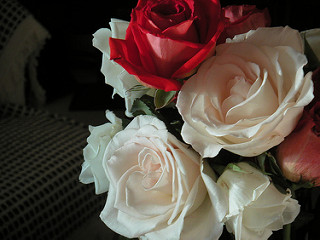

In [6]:
PIL.Image.open(str(roses[1]))

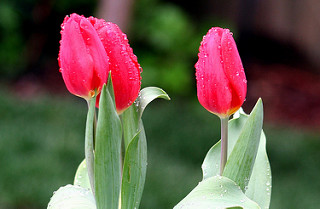

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

#### Read flowers images from disk into numpy array using opencv


In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
flowers_images_dict['roses'][:5]

[WindowsPath('data/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('data/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('data/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('data/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('data/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [11]:
str(flowers_images_dict['roses'][0])


'data\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [13]:
img.shape

(240, 179, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)

### Train test split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
#scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### convolutional neural network


In [19]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
            
    

In [20]:
model.fit(X_train_scaled, y_train, epochs=10)              

Epoch 1/10
86/86 [==============================] - 63s 706ms/step - loss: 1.5307 - accuracy: 0.3401
Epoch 2/10
86/86 [==============================] - 70s 820ms/step - loss: 1.1226 - accuracy: 0.5367
Epoch 3/10
86/86 [==============================] - 78s 909ms/step - loss: 0.9248 - accuracy: 0.6432
Epoch 4/10
86/86 [==============================] - 87s 1s/step - loss: 0.7147 - accuracy: 0.7271
Epoch 5/10
86/86 [==============================] - 85s 986ms/step - loss: 0.5177 - accuracy: 0.8092
Epoch 6/10
86/86 [==============================] - 85s 991ms/step - loss: 0.2781 - accuracy: 0.9052
Epoch 7/10
86/86 [==============================] - 87s 1s/step - loss: 0.1578 - accuracy: 0.9520
Epoch 8/10
86/86 [==============================] - 81s 939ms/step - loss: 0.0806 - accuracy: 0.9778
Epoch 9/10
86/86 [==============================] - 70s 809ms/step - loss: 0.0695 - accuracy: 0.9815
Epoch 10/10
86/86 [==============================] - 73s 843ms/step - loss: 0.0321 - accuracy: 0.

In [21]:
#Evaluation Model 
model.evaluate(X_test_scaled , y_test)

29/29 [==============================] - 9s 249ms/step - loss: 1.8188 - accuracy: 0.6100


[1.8187625408172607, 0.6100217700004578]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting.

 Let's make some predictions before we use data augmentation to address overfitting



In [22]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 8s 258ms/step


array([[  0.27070713,  11.285583  ,  -2.371233  ,  -6.5878057 ,
         -0.7341156 ],
       [  9.789896  ,  -0.6688795 ,  -9.479224  ,  -3.5749028 ,
          8.263823  ],
       [ -2.4099226 ,   3.1453397 ,   9.304746  ,  -4.792689  ,
          0.7023541 ],
       ...,
       [  4.9161944 ,  -7.659859  ,  -3.4221048 ,   4.840281  ,
          5.547808  ],
       [  3.0728135 ,  -1.3533742 ,   3.4661422 ,  -4.719206  ,
         -0.26930866],
       [  4.5571885 , -12.461581  ,   2.5617402 ,   5.7054124 ,
          6.5843062 ]], dtype=float32)

In [23]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6454704e-05, 9.9997628e-01, 1.1719527e-06, 1.7285256e-08,
       6.0242241e-06], dtype=float32)>

In [24]:
np.argmax(score)


1

### Improve Test Accuracy Using Data Augmentation


In [25]:
data_augmentation =keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    
])


In [26]:
X[0].shape

(180, 180, 3)

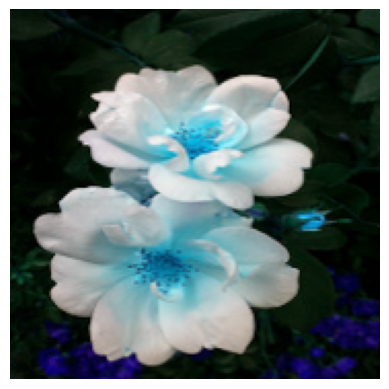

In [27]:
plt.axis("off")
plt.imshow(X[0])

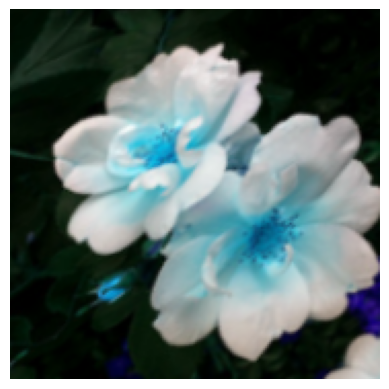

In [28]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation

In [29]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 104s 1s/step - loss: 1.4007 - accuracy: 0.3819
Epoch 2/10
86/86 [==============================] - 87s 1s/step - loss: 1.0782 - accuracy: 0.5705
Epoch 3/10
86/86 [==============================] - 87s 1s/step - loss: 1.0044 - accuracy: 0.6112
Epoch 4/10
86/86 [==============================] - 87s 1s/step - loss: 0.9181 - accuracy: 0.6374
Epoch 5/10
86/86 [==============================] - 86s 999ms/step - loss: 0.8568 - accuracy: 0.6795
Epoch 6/10
86/86 [==============================] - 85s 987ms/step - loss: 0.7881 - accuracy: 0.6882
Epoch 7/10
86/86 [==============================] - 88s 1s/step - loss: 0.7384 - accuracy: 0.7137
Epoch 8/10
86/86 [==============================] - 89s 1s/step - loss: 0.7379 - accuracy: 0.7155
Epoch 9/10
86/86 [==============================] - 86s 1s/step - loss: 0.6854 - accuracy: 0.7384
Epoch 10/10
86/86 [==============================] - 92s 1s/step - loss: 0.6514 - accuracy: 0.7500


In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 236ms/step - loss: 0.9168 - accuracy: 0.6786


[0.9168428778648376, 0.6786492466926575]